In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('train.csv')

df

,id,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,...,Col 56,Col 57,Col 58,Col 59,Col 60,Col 61,Col 62,Col 63,Col 64,y
0,0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,...,-0.022038,-0.031125,-0.000922,0.033494,0.000852,0.031150,-0.028191,-0.017658,-0.027794,151
1,1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,...,-0.011564,0.012973,0.023783,-0.023815,-0.094506,-0.140378,0.025298,0.053034,0.104013,75
2,2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,...,-0.022063,-0.018016,0.004913,0.032956,0.018281,0.032795,-0.027332,-0.017236,-0.022304,141
3,3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,...,-0.009984,-0.003373,-0.019109,0.008159,0.001898,0.021514,-0.012045,-0.024872,-0.025042,206
4,4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,...,-0.024091,-0.026846,-0.029687,0.030984,0.014489,0.005386,-0.025575,-0.016180,0.008735,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,-0.027310,0.050680,0.060618,0.049415,0.085116,0.086368,-0.002903,0.034309,0.037814,...,0.023104,0.056056,0.075937,0.029510,0.017894,0.010752,-0.001955,0.014242,0.015606,186
156,156,-0.016412,-0.044642,-0.010517,0.001215,-0.037344,-0.035760,0.011824,-0.039493,-0.021394,...,-0.001265,0.000986,0.012134,0.022610,0.014659,0.004828,-0.010755,0.008008,-0.006328,25
157,157,-0.001882,0.050680,-0.033151,-0.018294,0.031454,0.042840,-0.013948,0.019917,0.010226,...,-0.010049,-0.006214,0.011544,0.026163,0.017152,0.005169,-0.023226,-0.007626,-0.015175,84
158,158,-0.012780,-0.044642,-0.065486,-0.069938,0.001183,0.016849,-0.002903,-0.007020,-0.030751,...,-0.025315,-0.027269,-0.032436,0.031763,0.022391,0.017242,-0.022989,-0.011548,0.010113,96


In [5]:
# alpha = list(np.linspace(0, 100, 10))
# alpha

In [7]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['id', 'y'])
y = df['y']

sc = StandardScaler()
X = sc.fit_transform(X)

X_df = pd.DataFrame(X)

X_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.979154,1.119608,1.368607,0.574284,-0.889929,-0.664196,-0.951008,0.071018,0.595400,-0.262270,...,0.910503,-0.384391,-0.602067,-0.001035,0.744189,-0.028493,0.603965,-0.578879,-0.361646,-0.545574
1,0.145832,-0.893170,-1.097087,-0.479275,-0.056309,-0.318035,1.472666,-0.713171,-1.414235,-1.794395,...,-0.416689,-0.196079,0.415438,0.500077,-0.470420,-2.149835,-2.461611,0.783609,0.961210,2.221802
2,1.963990,1.119608,0.992882,-0.027750,-0.921991,-0.650350,-0.723788,0.071018,0.207206,-0.432506,...,0.727568,-0.384849,-0.299607,0.117330,0.732792,0.359227,0.633364,-0.556989,-0.353745,-0.430309
3,-1.672327,-0.893170,-0.228223,-0.705038,0.424625,0.658138,-0.799528,0.855207,0.658797,-0.092034,...,-0.179298,-0.167665,0.038271,-0.369933,0.207232,-0.005233,0.431742,-0.167610,-0.496642,-0.487800
4,0.297345,-0.893170,-0.768328,0.574284,0.232251,0.450442,0.109349,0.071018,-0.586626,-0.858096,...,0.285019,-0.421313,-0.503356,-0.584494,0.691003,0.274877,0.143495,-0.512226,-0.333994,0.221374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.384465,1.119608,1.345124,1.176318,2.123926,2.015089,-0.117870,0.855207,1.003213,1.099619,...,0.114356,0.427244,1.409505,1.557934,0.659760,0.350628,0.239397,0.089429,0.235312,0.365625
156,-0.157195,-0.893170,-0.204741,0.122758,-0.729617,-0.684966,0.185089,-0.713171,-0.345260,-0.602742,...,0.036589,-0.010901,0.138848,0.263794,0.513524,0.278659,0.133531,-0.134729,0.118648,-0.094878
157,0.145832,1.119608,-0.697880,-0.303682,0.873497,1.052762,-0.345089,0.549374,0.374874,0.674029,...,-0.042351,-0.168834,-0.027281,0.251814,0.588820,0.334113,0.139626,-0.452410,-0.173910,-0.280645
158,-0.081438,-0.893170,-1.402364,-1.432496,0.168127,0.478135,-0.117870,-0.023085,-0.558379,-0.943214,...,0.205541,-0.443309,-0.513098,-0.640242,0.707517,0.450668,0.355386,-0.446358,-0.247313,0.250302


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state=23)

print(X_train.shape, X_val.shape)
y = y.values

(120, 64) (40, 64)
0      151
1       75
2      141
3      206
4      135
      ... 
155    186
156     25
157     84
158     96
159    195
Name: y, Length: 160, dtype: int64


In [33]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.metrics import mean_squared_error, r2_score

alpha_values = np.round(np.linspace(1, 100, 100), 0)
train_mse = []
val_mse = []
r2_scores = []

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    # Predict on the training and validation sets
    y_pred_train = ridge.predict(X_train)
    y_pred_val = ridge.predict(X_val)
    
    # Calculate MSE and R^2 for training and validation sets
    train_mse.append(np.round(mean_squared_error(y_train, y_pred_train), 2))
    val_mse.append(np.round(mean_squared_error(y_val, y_pred_val), 2))
    r2_scores.append(np.round(r2_score(y_val, y_pred_val), 2))
    
    print(f'For alpha {alpha}, the train MSE is {train_mse[-1]}, and the validation MSE is {val_mse[-1]}, R^2 is {r2_scores[-1]}')

# Find the alpha with the lowest validation MSE
best_alpha = alpha_values[np.argmin(val_mse)]
print(f'Best alpha: {best_alpha}')

For alpha 1.0, the train MSE is 1748.25, and the validation MSE is 3391.76, R^2 is 0.34
For alpha 2.0, the train MSE is 1788.47, and the validation MSE is 3151.17, R^2 is 0.39
For alpha 3.0, the train MSE is 1818.39, and the validation MSE is 2992.43, R^2 is 0.42
For alpha 4.0, the train MSE is 1842.91, and the validation MSE is 2876.55, R^2 is 0.44
For alpha 5.0, the train MSE is 1864.02, and the validation MSE is 2787.53, R^2 is 0.46
For alpha 6.0, the train MSE is 1882.79, and the validation MSE is 2716.95, R^2 is 0.47
For alpha 7.0, the train MSE is 1899.86, and the validation MSE is 2659.74, R^2 is 0.49
For alpha 8.0, the train MSE is 1915.65, and the validation MSE is 2612.61, R^2 is 0.5
For alpha 9.0, the train MSE is 1930.45, and the validation MSE is 2573.3, R^2 is 0.5
For alpha 10.0, the train MSE is 1944.47, and the validation MSE is 2540.17, R^2 is 0.51
For alpha 11.0, the train MSE is 1957.83, and the validation MSE is 2512.03, R^2 is 0.51
For alpha 12.0, the train MSE is 

In [34]:
# RidgeCV

ridge_cv = RidgeCV(alphas=alpha_values, cv=5)  # Create a RidgeCV model with cross-validation
ridge_cv.fit(X_train, y_train)  # Fit the model to your training data

# Access the best alpha and coefficients
best_alpha = ridge_cv.alpha_
coefficients = ridge_cv.coef_

# Make predictions on the validation set
y_pred_val = ridge_cv.predict(X_val)

# Calculate MSE and R^2 for validation set
val_mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print(f'Best alpha: {best_alpha}')
print(f'Validation MSE: {val_mse}')
print(f'R^2 score on validation set: {r2}')

Best alpha: 74.0
Validation MSE: 2450.091703383112
R^2 score on validation set: 0.5264539011776506


In [36]:
# Ridge final model

model = Ridge(alpha = 50)
model.fit(X, y)

Ridge(alpha=50)

In [35]:
# LassoCV

from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=alpha_values, cv=5)  # Create a LassoCV model with cross-validation
lasso_cv.fit(X_train, y_train)  # Fit the model to your training data

# Access the best alpha and coefficients
best_alpha = lasso_cv.alpha_
coefficients = lasso_cv.coef_

# Make predictions on the validation set
y_pred_val = lasso_cv.predict(X_val)

# Calculate MSE and R^2 for validation set
val_mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print(f'Best alpha: {best_alpha}')
print(f'Validation MSE: {val_mse}')
print(f'R^2 score on validation set: {r2}')

Best alpha: 3.0
Validation MSE: 2446.8318633227263
R^2 score on validation set: 0.5270839529186728


In [40]:
# Lasso final model
from sklearn.linear_model import Lasso

model = Lasso(alpha = 3)
model.fit(X, y)

Lasso(alpha=3)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      160 non-null    int64  
 1   Col 1   160 non-null    float64
 2   Col 2   160 non-null    float64
 3   Col 3   160 non-null    float64
 4   Col 4   160 non-null    float64
 5   Col 5   160 non-null    float64
 6   Col 6   160 non-null    float64
 7   Col 7   160 non-null    float64
 8   Col 8   160 non-null    float64
 9   Col 9   160 non-null    float64
 10  Col 10  160 non-null    float64
 11  Col 11  160 non-null    float64
 12  Col 12  160 non-null    float64
 13  Col 13  160 non-null    float64
 14  Col 14  160 non-null    float64
 15  Col 15  160 non-null    float64
 16  Col 16  160 non-null    float64
 17  Col 17  160 non-null    float64
 18  Col 18  160 non-null    float64
 19  Col 19  160 non-null    float64
 20  Col 20  160 non-null    float64
 21  Col 21  160 non-null    float64
 22  Co

In [20]:
y_train

45      53
102    302
72     202
136     85
67      97
      ... 
39      90
91     164
31      59
40     100
83     210
Name: y, Length: 120, dtype: int64

In [208]:
df.isnull().sum()

id        0
Col 1     0
Col 2     0
Col 3     0
Col 4     0
         ..
Col 61    0
Col 62    0
Col 63    0
Col 64    0
y         0
Length: 66, dtype: int64

In [209]:
df['y']

0      151
1       75
2      141
3      206
4      135
      ... 
155    186
156     25
157     84
158     96
159    195
Name: y, Length: 160, dtype: int64

(array([15., 26., 29., 24., 21., 14.,  6., 12.,  9.,  4.]),
 array([ 25. ,  56.6,  88.2, 119.8, 151.4, 183. , 214.6, 246.2, 277.8,
        309.4, 341. ]),
 <BarContainer object of 10 artists>)

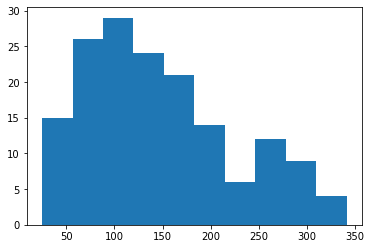

In [210]:
plt.hist(df['y'])

In [211]:
df.describe(include='all')

,id,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,...,Col 56,Col 57,Col 58,Col 59,Col 60,Col 61,Col 62,Col 63,Col 64,y
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,79.500000,-0.008875,-0.002343,-0.001120,-0.004401,-0.006032,-0.004778,0.002827,-0.005934,-0.006234,...,-0.000659,-0.005031,-0.000871,-0.001619,0.002133,-0.002643,-0.005465,0.001668,-0.001809,147.843750
std,46.332134,0.048101,0.047507,0.046042,0.045894,0.043050,0.045374,0.048762,0.047204,0.044045,...,0.055793,0.043475,0.049456,0.047331,0.045093,0.056129,0.039382,0.053606,0.047778,76.364695
min,0.000000,-0.107226,-0.044642,-0.083808,-0.108957,-0.126781,-0.106845,-0.102307,-0.076395,-0.126097,...,-0.076433,-0.155145,-0.151734,-0.228580,-0.143972,-0.223255,-0.160745,-0.128919,-0.092165,25.000000
25%,39.750000,-0.046381,-0.044642,-0.035307,-0.036656,-0.037344,-0.034273,-0.032356,-0.039493,-0.034524,...,-0.023703,-0.022007,-0.020446,-0.021084,-0.018638,-0.017585,-0.026875,-0.019626,-0.023964,87.750000
50%,79.500000,-0.001882,-0.044642,-0.006206,-0.012556,-0.005009,-0.009925,-0.002903,-0.002592,-0.010412,...,-0.014868,-0.009495,-0.010498,0.014418,0.009642,0.009252,-0.014899,-0.015336,-0.015265,134.500000
75%,119.250000,0.030811,0.050680,0.028284,0.021872,0.020446,0.021703,0.037595,0.025822,0.026221,...,0.003447,0.013173,0.009096,0.031522,0.022619,0.022176,0.014464,0.018200,0.011668,195.500000
max,159.000000,0.085299,0.050680,0.128521,0.125158,0.152538,0.198788,0.181179,0.185234,0.133599,...,0.555129,0.113164,0.299032,0.080445,0.163067,0.209905,0.157844,0.318104,0.338184,341.000000


In [212]:
X = df.drop(columns=['y'])
y = df['y']

In [213]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=23)

print(X_train.shape)
print(X_test.shape)

(128, 2)
(32, 2)


In [215]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

In [216]:
mse = mean_squared_error(y_test, y_pred)

np.round(mse, 2)

5107.34

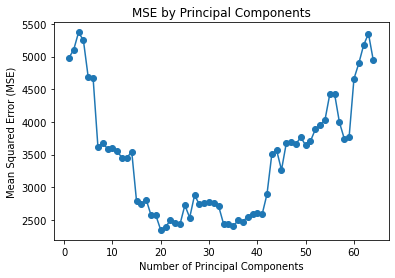

In [217]:
# Find best principal components by mse score

# Intialize mse
mse = []
num_comps = []

for comp in range(1, len(X.columns)):
    pca = PCA(n_components=comp)
    X_pca = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=23)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))
    num_comps.append(comp)

plt.scatter(num_comps, mse)
plt.plot(num_comps, mse)
plt.title("MSE by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Mean Squared Error (MSE)")
plt.show()


In [218]:
best_mse = min(mse)
best_num_comp = np.argmin(mse)+1

print(f'Best number of principal components: {best_num_comp}\nBest MSE: {best_mse}')

Best number of principal components: 20
Best MSE: 2345.448194670188


## Standardizing variables

In [219]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=(['id', 'y']))
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [220]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)

5702.131169565064
-0.20950829219659206


mse of 5702 is baseline

In [221]:
# import seaborn as sns

# # Create a heatmap
# plt.figure(figsize=(40, 12))
# sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()


## Random Forest

In [222]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [223]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Create a KFold object for cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=23)

# Create a RandomForestRegressor instance
rf = RandomForestRegressor()

# Create a pipeline
pipeline = Pipeline([
    ('rf', rf)
])

# Create GridSearchCV with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=k_fold, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean squared error
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print(r2)

Best Parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 50}
Mean Squared Error: 3555.3357608149126
0.2458594942184188


In [224]:
# Final fit
model = RandomForestRegressor(
    n_estimators=best_params['rf__n_estimators'],  # Replace with your best hyperparameters
    max_depth=best_params['rf__max_depth'],
    min_samples_split=best_params['rf__min_samples_split'],
    min_samples_leaf=best_params['rf__min_samples_leaf']
)

model.fit(X_train, y_train)  # Replace with your training data

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=50)

In [225]:
y_pred = model.predict(X_test)  # Replace with your testing data
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Data:", mse)

Mean Squared Error on Test Data: 3144.3486130357396


## Gradient Boosting Regressor

In [226]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(
    n_estimators=100,             # Number of boosting rounds (trees)
    max_depth=3,                  # Maximum tree depth
    learning_rate=0.1,            # Learning rate
    random_state=42               # Random seed for reproducibility
)

# Fit the model to your training data
gb_regressor.fit(X_train, y_train)

# Evaluate the model's performance on the test data (optional)
y_pred = gb_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Data:", mse)

Mean Squared Error on Test Data: 3408.695740883035


In [283]:
from sklearn.metrics import r2_score

# Define parameter grid

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.005, 0.01, 0.1],
    'max_depth': [1, 2, 3],
    'min_samples_split': [5, 10, 15],
}

# Perfrom grid search

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Use negative mean squared error for regression
                           cv=5,  # Cross-validation folds
                           n_jobs=-1)  # Use all available CPU cores


grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
model = grid_search.best_estimator_

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

Best Parameters: {'learning_rate': 0.01, 'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 200}
MSE: 3133.9894971384883
R-squared: 0.3352334115570407


Able to account for around 33% of explained variance

In [285]:
model.fit(X, y)

GradientBoostingRegressor(learning_rate=0.01, max_depth=2, min_samples_split=5,
                          n_estimators=200)

In [305]:
# pca = PCA(n_components=20)
# X_pca = pca.fit_transform(X)

# X_pca

array([[-0.13514621, -0.00474979,  0.02583257, ..., -0.0084823 ,
        -0.01897076,  0.01031128],
       [ 0.10958537, -0.04190665,  0.23006124, ..., -0.02666256,
         0.01975327,  0.00815665],
       [-0.13193769, -0.00900334, -0.01233844, ..., -0.01139219,
        -0.06182718,  0.02191633],
       ...,
       [-0.08842229,  0.07198216, -0.04962685, ...,  0.02156718,
        -0.00356099,  0.01186815],
       [-0.04012474, -0.0893297 ,  0.04881715, ...,  0.03274057,
         0.04612079, -0.04532398],
       [-0.11226846,  0.00593371, -0.01697215, ..., -0.01264661,
         0.02143295,  0.01852741]])

In [306]:
# # Create a DataFrame for the principal components
# pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(20)])

# # Concatenate the PCA DataFrame with your original DataFrame X
# X_with_pca = pd.concat([X, pca_df], axis=1)

# X_with_pca

,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,Col 10,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,...,0.022265,-0.039228,-0.015740,-0.025075,0.053813,0.025636,0.004854,-0.008482,-0.018971,0.010311
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,...,0.045855,-0.047766,-0.036022,-0.039965,-0.062375,-0.023645,0.048946,-0.026663,0.019753,0.008157
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,...,0.020876,-0.010511,-0.046361,-0.080511,0.059445,0.000677,0.011291,-0.011392,-0.061827,0.021916
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,...,0.059722,0.123671,-0.064285,0.088771,0.036069,-0.064199,-0.017148,0.025608,-0.035049,0.037246
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,...,0.024569,-0.008119,-0.017292,-0.034439,-0.046257,-0.015562,0.013945,-0.013426,0.035698,-0.023829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.027310,0.050680,0.060618,0.049415,0.085116,0.086368,-0.002903,0.034309,0.037814,0.048628,...,0.009934,-0.043209,-0.052963,-0.041562,-0.109108,-0.054037,-0.080887,-0.000646,0.032465,0.066073
156,-0.016412,-0.044642,-0.010517,0.001215,-0.037344,-0.035760,0.011824,-0.039493,-0.021394,-0.034215,...,0.013241,-0.037061,0.002724,-0.004769,-0.038225,0.025572,-0.004667,-0.006226,-0.005973,-0.031314
157,-0.001882,0.050680,-0.033151,-0.018294,0.031454,0.042840,-0.013948,0.019917,0.010226,0.027917,...,0.005283,-0.012756,0.008345,-0.026326,-0.028209,0.004526,-0.004450,0.021567,-0.003561,0.011868
158,-0.012780,-0.044642,-0.065486,-0.069938,0.001183,0.016849,-0.002903,-0.007020,-0.030751,-0.050783,...,0.034837,0.049515,-0.027792,-0.015483,-0.001802,-0.053960,0.019541,0.032741,0.046121,-0.045324


In [309]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_with_pca, y, test_size=0.2, random_state=23)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [314]:
# Define parameter grid

param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.005, 0.01, 0.1],
    'max_depth': [1, 2, 3],
    'min_samples_split': [5, 10, 15],
}

# Perfrom grid search

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Use negative mean squared error for regression
                           cv=5,  # Cross-validation folds
                           n_jobs=-1)  # Use all available CPU cores


grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
model = grid_search.best_estimator_

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

Best Parameters: {'learning_rate': 0.01, 'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 300}
MSE: 3118.6070544717363
R-squared: 0.3384962603773167


In [311]:
model.fit(X, y)

GradientBoostingRegressor(learning_rate=0.01, max_depth=2, min_samples_split=5,
                          n_estimators=300)

# Kaggle Submission

In [37]:
# Load test dataset

x_test_kaggle = pd.read_csv('x_test.csv')

In [41]:
# drop ID

x_test_kaggle_drop = x_test_kaggle.drop('id', axis=1)

# Get predictions 

y_pred_kaggle = model.predict(x_test_kaggle_drop)

/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [42]:
kaggle_df = pd.read_csv('sample_submission.csv')
kaggle_df['y'] = y_pred_kaggle


# kaggle_df.to_csv('submission.csv', index=False)
kaggle_df = kaggle_df[['id', 'y']]
kaggle_df.to_csv('brian_submission_lasso.csv', index=False)